In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.models import LinearColorMapper, ColorBar
from bokeh.transform import transform
output_notebook()

Loading BokehJS ...

In [118]:
df = pd.read_pickle("KinageAllKepler.pkl")
#list(df.columns)
df=df.dropna(subset=['kin_age'])

In [58]:
df['vel_dis']

0        18.763680
1        18.819795
2        19.208562
3        13.803825
4        20.238141
           ...    
52054    18.982160
52055    19.258384
52056    19.422701
52057    19.721345
52058    20.041902
Name: vel_dis, Length: 52025, dtype: float64

In [71]:
source = ColumnDataSource(data=dict(teff=df.teff_calc.values, mg=df.abs_G.values, prot=df.Prot_mix.values, age=df.kin_age.values, vd=df.vel_dis.values))

TOOLS = "box_select,lasso_select,help,reset"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=600, height=500)
color_mapper = LinearColorMapper(palette="Plasma256", low=0, high=10)

# left.circle('teff', 'mg', source=source)
r = left.circle(x='teff', y='prot', color=transform('age', color_mapper), size=5, alpha=0.6, source=source)
left.xaxis.axis_label = 'Teff [K]'
left.yaxis.axis_label = 'M_G'
#left.y_range.flipped = True
left.x_range.flipped = True


color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Age [Gyr]')
left.add_layout(color_bar, 'right')




# create another new plot and add a renderer
right = figure(tools=TOOLS, width=600, height=500, y_axis_type="log")
color_mapper = LinearColorMapper(palette="Plasma256", low=0, high=30)
right.circle(x='age', y='prot', color=transform('vd', color_mapper), size=5, alpha=0.6, source=source)
# right.circle('teff', 'prot', source=source)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='vel_dis [km/s]')
right.add_layout(color_bar, 'right')

right.xaxis.axis_label = 'age [gyr]'
right.yaxis.axis_label = 'Prot [days]'

p = gridplot([[left, right]])

"""
# histogram
hhist, hedges = np.histogram(df['kin_age'], bins=20)
hzeros = np.zeros(len(hedges)-1)
hmax = max(hhist)*1.1

LINE_ARGS = dict(color="#3A5785", line_color=None)

right = figure(tools=TOOLS, width=600, height=500)
right.xgrid.grid_line_color = None
right.background_fill_color = "#fafafa"

right.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hhist, color="white", line_color="#3A5785")
hh1 = right.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hzeros, alpha=0.5, **LINE_ARGS)
hh2 = right.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hzeros, alpha=0.1, **LINE_ARGS)

x=df['kin_age'].values
def update(attr, old, new):
    inds = new
    if len(inds) == 0 or len(inds) == len(x):
        hhist1, hhist2 = hzeros, hzeros
    else:
        neg_inds = np.ones_like(x, dtype=np.bool)
        neg_inds[inds] = False
        hhist1, _ = np.histogram(x[inds], bins=hedges)
        hhist2, _ = np.histogram(x[neg_inds], bins=hedges)

    hh1.data_source.data["top"]   =  hhist1
    hh2.data_source.data["top"]   = -hhist2

r.data_source.selected.on_change('indices', update)
"""
p = gridplot([[left, right]])

show(p)

In [126]:
df = pd.read_pickle("./Figures/comp.pkl")
df['abs_G_x']
df['ML']=np.power(df['mass'],-2.5)*10

In [143]:
"""
source = ColumnDataSource(data=dict(teff=df.teff_calc_x.values, mg=df.abs_G_x.values, prot=df.Prot_mix.values, 
                                    age_1=df.kin_age_x.values, age_2=df.kin_age_y.values,lt=df.kin_age_x.values/df['ML'].values))

"""
source = ColumnDataSource(data=dict(teff=df.teff_calc_x.values, mg=df.abs_G_x.values, prot=df.Prot_mix.values, 
                                    age_1=df.kin_age_x.values, age_2=df.kin_age_y.values,lt=df['ML'].values))


TOOLS = "box_select,lasso_select,help,reset"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=600, height=500, x_axis_type="log")
color_mapper = LinearColorMapper(palette="Plasma256", low=0, high=50)

# left.circle('teff', 'mg', source=source)
r = left.circle(x='lt', y='age_1', color=transform('lt', color_mapper), size=5, alpha=0.6, source=source)
left.xaxis.axis_label = 'MSLT'
left.yaxis.axis_label = 'kin_age [gyr]'
#left.y_range.flipped = True
#left.x_range.flipped = True


color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='MSLT')
left.add_layout(color_bar, 'right')




# create another new plot and add a renderer
right = figure(tools=TOOLS, width=600, height=500)
color_mapper = LinearColorMapper(palette="Plasma256", low=0, high=50)
right.circle(x='age_1', y='age_2', color=transform('lt', color_mapper), size=5, alpha=0.6, source=source)
# right.circle('teff', 'prot', source=source)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='MSLT')
right.add_layout(color_bar, 'right')

right.xaxis.axis_label = 'Measured+predicted Prot Age  [Gyr]'
right.yaxis.axis_label = 'Prot age [Gyr]'

p = gridplot([[left, right]])

"""
# histogram
hhist, hedges = np.histogram(df['kin_age'], bins=20)
hzeros = np.zeros(len(hedges)-1)
hmax = max(hhist)*1.1

LINE_ARGS = dict(color="#3A5785", line_color=None)

right = figure(tools=TOOLS, width=600, height=500)
right.xgrid.grid_line_color = None
right.background_fill_color = "#fafafa"

right.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hhist, color="white", line_color="#3A5785")
hh1 = right.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hzeros, alpha=0.5, **LINE_ARGS)
hh2 = right.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hzeros, alpha=0.1, **LINE_ARGS)

x=df['kin_age'].values
def update(attr, old, new):
    inds = new
    if len(inds) == 0 or len(inds) == len(x):
        hhist1, hhist2 = hzeros, hzeros
    else:
        neg_inds = np.ones_like(x, dtype=np.bool)
        neg_inds[inds] = False
        hhist1, _ = np.histogram(x[inds], bins=hedges)
        hhist2, _ = np.histogram(x[neg_inds], bins=hedges)

    hh1.data_source.data["top"]   =  hhist1
    hh2.data_source.data["top"]   = -hhist2

r.data_source.selected.on_change('indices', update)
"""
p = gridplot([[left, right]])

show(p)

In [92]:
df['ML']=np.power(df['mass'],-2.5)*10

In [98]:
max(df['ML'])

2329.720875983748

In [101]:
source = ColumnDataSource(data=dict(teff=df.teff_calc.values, mg=df.abs_G.values, prot=df.Prot_mix.values, age=df.kin_age.values, mass=df.mass.values,lt=df.kin_age.values/df.ML.values))

TOOLS = "box_select,lasso_select,help,reset"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=600, height=500)
color_mapper = LinearColorMapper(palette="Plasma256", low=0, high=10)

# left.circle('teff', 'mg', source=source)
r = left.circle(x='teff', y='prot', color=transform('age', color_mapper), size=5, alpha=0.6, source=source)
left.xaxis.axis_label = 'Teff [K]'
left.yaxis.axis_label = 'M_G'
#left.y_range.flipped = True
left.x_range.flipped = True


color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='Age [Gyr]')
left.add_layout(color_bar, 'right')




# create another new plot and add a renderer
right = figure(tools=TOOLS, width=600, height=500)
color_mapper = LinearColorMapper(palette="Plasma256", low=0, high=10)
right.circle(x='lt', y='age', color=transform('mg', color_mapper), size=5, alpha=0.6, source=source)
# right.circle('teff', 'prot', source=source)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='vel_dis [km/s]')
right.add_layout(color_bar, 'right')

right.xaxis.axis_label = 'ML [gyr]'
right.yaxis.axis_label = 'age [days]'

p = gridplot([[left, right]])

"""
# histogram
hhist, hedges = np.histogram(df['kin_age'], bins=20)
hzeros = np.zeros(len(hedges)-1)
hmax = max(hhist)*1.1

LINE_ARGS = dict(color="#3A5785", line_color=None)

right = figure(tools=TOOLS, width=600, height=500)
right.xgrid.grid_line_color = None
right.background_fill_color = "#fafafa"

right.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hhist, color="white", line_color="#3A5785")
hh1 = right.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hzeros, alpha=0.5, **LINE_ARGS)
hh2 = right.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hzeros, alpha=0.1, **LINE_ARGS)

x=df['kin_age'].values
def update(attr, old, new):
    inds = new
    if len(inds) == 0 or len(inds) == len(x):
        hhist1, hhist2 = hzeros, hzeros
    else:
        neg_inds = np.ones_like(x, dtype=np.bool)
        neg_inds[inds] = False
        hhist1, _ = np.histogram(x[inds], bins=hedges)
        hhist2, _ = np.histogram(x[neg_inds], bins=hedges)

    hh1.data_source.data["top"]   =  hhist1
    hh2.data_source.data["top"]   = -hhist2

r.data_source.selected.on_change('indices', update)
"""
p = gridplot([[left, right]])

show(p)

In [127]:
from stardate.lhf import gk_rotation_model

In [136]:
pred_period = 10**gk_rotation_model(np.log10(df.kin_age_x.values*1e9), df.phot_bp_mean_mag - df.phot_rp_mean_mag)
df['pred_period'] = pred_period
df['diffs'] = (abs(pred_period - df.Prot_mix.values))


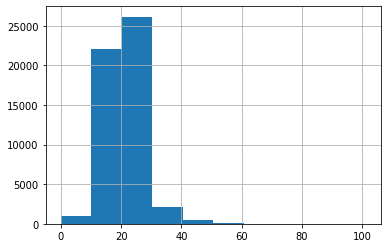

In [124]:
df['diffs'].hist()

In [138]:
source = ColumnDataSource(data=dict(teff=df.teff_calc_x.values, mg=df.abs_G_x.values, prot=df.Prot_mix.values, 
                                    age_1=df.kin_age_x.values, age_2=df.kin_age_y.values,lt=df.diffs.values))

TOOLS = "box_select,lasso_select,help,reset"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=600, height=500)
color_mapper = LinearColorMapper(palette="Plasma256", low=0, high=50)

# left.circle('teff', 'mg', source=source)
r = left.circle(x='lt', y='prot', color=transform('lt', color_mapper), size=5, alpha=0.6, source=source)
left.xaxis.axis_label = 'diff'
left.yaxis.axis_label = 'prot now'
#left.y_range.flipped = True
#left.x_range.flipped = True


color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='kinage/MSLT')
left.add_layout(color_bar, 'right')




# create another new plot and add a renderer
right = figure(tools=TOOLS, width=600, height=500)
color_mapper = LinearColorMapper(palette="Plasma256", low=0, high=50)
right.circle(x='age_1', y='age_2', color=transform('lt', color_mapper), size=5, alpha=0.6, source=source)
# right.circle('teff', 'prot', source=source)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0), title='kinage/MSLT')
right.add_layout(color_bar, 'right')

right.xaxis.axis_label = 'Measured+predicted Prot Age  [Gyr]'
right.yaxis.axis_label = 'Prot age [Gyr]'

p = gridplot([[left, right]])

"""
# histogram
hhist, hedges = np.histogram(df['kin_age'], bins=20)
hzeros = np.zeros(len(hedges)-1)
hmax = max(hhist)*1.1

LINE_ARGS = dict(color="#3A5785", line_color=None)

right = figure(tools=TOOLS, width=600, height=500)
right.xgrid.grid_line_color = None
right.background_fill_color = "#fafafa"

right.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hhist, color="white", line_color="#3A5785")
hh1 = right.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hzeros, alpha=0.5, **LINE_ARGS)
hh2 = right.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hzeros, alpha=0.1, **LINE_ARGS)

x=df['kin_age'].values
def update(attr, old, new):
    inds = new
    if len(inds) == 0 or len(inds) == len(x):
        hhist1, hhist2 = hzeros, hzeros
    else:
        neg_inds = np.ones_like(x, dtype=np.bool)
        neg_inds[inds] = False
        hhist1, _ = np.histogram(x[inds], bins=hedges)
        hhist2, _ = np.histogram(x[neg_inds], bins=hedges)

    hh1.data_source.data["top"]   =  hhist1
    hh2.data_source.data["top"]   = -hhist2

r.data_source.selected.on_change('indices', update)
"""
p = gridplot([[left, right]])

show(p)